In [3]:
# Import required libraries
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [4]:
# Load the dataset
from load_data import load_data_from_postgres

In [5]:
# Define your SQL query
query = "SELECT * FROM xdr_data;" # Replace with your actual table name.

# Load data from PostgreSQL
df = load_data_from_postgres(query)

# Display the first few rows of the dataframe
if df is not None:
    print("Successfully loaded the data.")
else:
    print("Failed to load data.")

c:\Users\biement fanteye\Desktop\TelloCello\scripts\load_data.py:35: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


Successfully loaded the data.


In [6]:
# Inspect the first few rows of the dataset
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [7]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


In [8]:
# Aggregate the engagement metrics per MSISDN
user_engagement = df.groupby('MSISDN/Number').agg(
    session_count=('Bearer Id', 'count'),
    total_duration=('Dur. (ms)', 'sum'),
    total_traffic_dl=('Total DL (Bytes)', 'sum'),
    total_traffic_ul=('Total UL (Bytes)', 'sum')
)

# Calculate total traffic (DL + UL)
user_engagement['total_traffic'] = user_engagement['total_traffic_dl'] + user_engagement['total_traffic_ul']

# Inspect the results
user_engagement.head()

,session_count,total_duration,total_traffic_dl,total_traffic_ul,total_traffic
MSISDN/Number,,,,,
3.360100e+10,1,116720.0,8.426375e+08,36053108.0,8.786906e+08
3.360100e+10,1,181230.0,1.207552e+08,36104459.0,1.568596e+08
3.360100e+10,1,134969.0,5.566597e+08,39306820.0,5.959665e+08
3.360101e+10,1,49878.0,4.019932e+08,20327526.0,4.223207e+08
3.360101e+10,2,37104.0,1.363130e+09,94280527.0,1.457411e+09


In [9]:
# Top 10 customers by session count
top_10_sessions = user_engagement.nlargest(10, 'session_count')

# Top 10 customers by total duration
top_10_duration = user_engagement.nlargest(10, 'total_duration')

# Top 10 customers by total traffic
top_10_traffic = user_engagement.nlargest(10, 'total_traffic')

# Display the results
print("Top 10 by Sessions:\n", top_10_sessions)
print("Top 10 by Duration:\n", top_10_duration)
print("Top 10 by Traffic:\n", top_10_traffic)


Top 10 by Sessions:
                session_count  total_duration  total_traffic_dl  \
MSISDN/Number                                                    
3.362632e+10              18       8791927.0      7.301517e+09   
3.361489e+10              17       9966898.0      8.156743e+09   
3.362578e+10              17      18553754.0      7.770043e+09   
3.365973e+10              16       4035428.0      7.081602e+09   
3.367588e+10              15       4865947.0      7.309542e+09   
3.376054e+10              15       9279434.0      7.811295e+09   
3.366716e+10              13       8744914.0      5.052068e+09   
3.360313e+10              12       6287761.0      4.540607e+09   
3.360452e+10              12       5207990.0      5.096079e+09   
3.362708e+10              12       4703516.0      5.309479e+09   

               total_traffic_ul  total_traffic  
MSISDN/Number                                   
3.362632e+10        669650721.0   7.971167e+09  
3.361489e+10        689483001.0   8.846

In [20]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Normalize the data (session_count, total_duration, total_traffic)
scaler = MinMaxScaler()
user_engagement_scaled = pd.DataFrame(scaler.fit_transform(user_engagement), columns=user_engagement.columns)

# Perform KMeans clustering with k=3
kmeans = KMeans(n_clusters=3, random_state=42)
user_engagement['cluster'] = kmeans.fit_predict(user_engagement_scaled)

# Inspect the clusters
user_engagement.groupby('cluster').agg(
    min_sessions=('session_count', 'min'),
    max_sessions=('session_count', 'max'),
    avg_sessions=('session_count', 'mean'),
    total_sessions=('session_count', 'sum'),
    min_duration=('total_duration', 'min'),
    max_duration=('total_duration', 'max'),
    avg_duration=('total_duration', 'mean'),
    total_duration=('total_duration', 'sum'),
    min_traffic=('total_traffic', 'min'),
    max_traffic=('total_traffic', 'max'),
    avg_traffic=('total_traffic', 'mean'),
    total_traffic=('total_traffic', 'sum')
)

,min_sessions,max_sessions,avg_sessions,total_sessions,min_duration,max_duration,avg_duration,total_duration,min_traffic,max_traffic,avg_traffic,total_traffic
cluster,,,,,,,,,,,,
0,1,5,2.190121,45802,18235.0,3174824.0,215579.319371,4.508410e+09,2.842182e+08,2.029605e+09,1.145221e+09,2.395002e+13
1,3,18,4.264327,16891,49323.0,18553754.0,571510.541025,2.263753e+09,1.085994e+09,8.846226e+09,2.296464e+09,9.096294e+12
2,1,3,1.051963,86242,7142.0,2083209.0,107909.957027,8.846674e+09,3.324901e+07,9.507607e+08,4.975133e+08,4.078714e+13


In [21]:
# Aggregate total traffic per application (replace 'Application DL (Bytes)' with actual application fields)
apps = ['Social Media DL (Bytes)', 'Youtube DL (Bytes)', 'Netflix DL (Bytes)', 'Google DL (Bytes)', 
        'Email DL (Bytes)', 'Gaming DL (Bytes)', 'Other DL (Bytes)']

user_app_traffic = df.groupby('MSISDN/Number')[apps].sum()

# Find the top 10 users per application
top_10_apps = {}
for app in apps:
    top_10_apps[app] = user_app_traffic.nlargest(10, app)

# Display the results for one application (Social Media)
print("Top 10 Social Media Users:\n", top_10_apps['Social Media DL (Bytes)'])

Top 10 Social Media Users:
                Social Media DL (Bytes)  Youtube DL (Bytes)  \
MSISDN/Number                                                
3.362632e+10                42743837.0         164048706.0   
3.376054e+10                39297646.0         194068298.0   
3.365973e+10                34900444.0         119658146.0   
3.361489e+10                27749744.0         199823443.0   
3.362578e+10                26564121.0         237883033.0   
3.366716e+10                23753753.0         141972692.0   
3.378632e+10                23568655.0         118129859.0   
3.366907e+10                23477047.0         136295265.0   
3.360313e+10                22776679.0         158976704.0   
3.365849e+10                22695673.0          64799443.0   

               Netflix DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
MSISDN/Number                                                            
3.362632e+10          199479238.0        116106455.0        33404785.0   
3.376

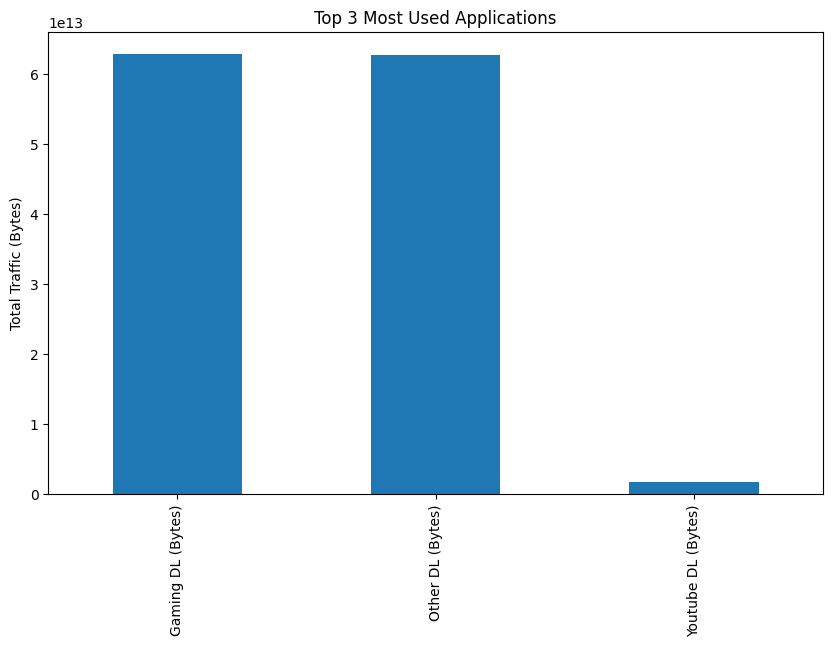

In [22]:
import matplotlib.pyplot as plt

# Sum the total usage per application
app_usage = user_app_traffic[apps].sum()

# Plot the top 3 most used applications
top_3_apps = app_usage.nlargest(3)
top_3_apps.plot(kind='bar', figsize=(10, 6), title="Top 3 Most Used Applications")
plt.ylabel('Total Traffic (Bytes)')
plt.show()

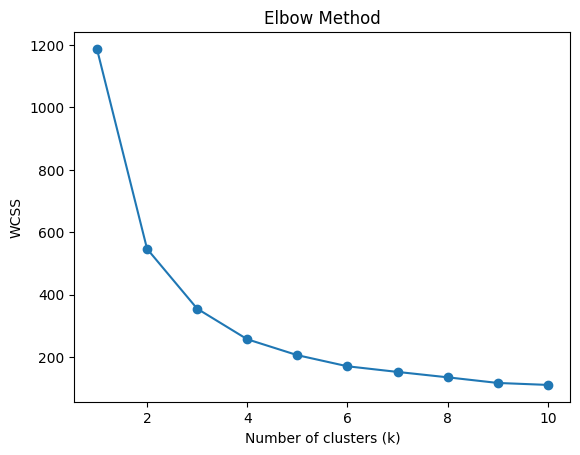

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate the within-cluster sum of squares (WCSS) for different values of k
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(user_engagement_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()